In [57]:
#code scaled to first 100 trucks

import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd



base_url = ('https://www.kbb.com/cars-for-sale/all/truck/santa-ana-ca-92705/?searchByDma=false&relevanceConfig=default&dma=&searchRadius=10' +
            '&location=&marketExtension=off&isNewSearch=false&showAccelerateBanner=false&sortBy=derivedpriceASC&numRecords=100')
page = requests.get(base_url).text
soup = bs(page)
url__link_test_list = []

for url in soup.find_all(class_="inventory-listing cursor-pointer panel panel-default"):
    url_link = url.find('a')['href']
    url__link_test_list.append(url_link)

url__link_test_list


######################################################################################################
mvp_car_dict_list = []

for i in range(0,99):
    try:
        mvp_links = 'https://kbb.com'+url__link_test_list[i]
        individual_page = requests.get(mvp_links).text
        individual_soup = bs(individual_page)
        individual_data = []


        car1_info = []
        car1_dict_list = []

        for item in individual_soup.find_all(class_="list-bordered list-condensed"):
        #thing1 = item.find('aria-label')
            thing2 = item.find(class_ = 'col-xs-10 margin-bottom-0').text
            car1_info.append(thing2)
        #print(thing2)
    
        car1_info
        
        #mvp_car_dict_list = []
        mileage = car1_info[0].split()[0]
        ext_color = car1_info[1]
        int_color = car1_info[2]
        engine_size = car1_info[3].split()[0]
        num_of_cylinders = car1_info[3].split()[1].split('-')[0]
        trans_type = ''
        #price1 = car1_info.find(class_ = 'first-price').find(class_ = 'text-bold').text
        if 'Automatic' in car1_info[4]:
            trans_type = 'Automatic'
        else:
            trans_type = 'Manual'
        awd = ''
        if '2' in car1_info[5]:
            awd = 'no'
        elif 'two' in car1_info[5]:
            awd = 'no'
        elif 'Two' in car1_info[5]:
            awd = 'no'
        else:
            awd = 'yes'
        mvp_car_dict_list.append({'mileage': mileage, 'ext_color': ext_color, 'int_color': int_color, 'engine_size': engine_size, 'cylinders': num_of_cylinders, 'transmission': trans_type, 'awd': awd})

        mvp_car_dict_list
        
        
    except:
        print('An error occured at ' + str(i))

An error occured at 0
An error occured at 1
An error occured at 2
An error occured at 3
An error occured at 4
An error occured at 5
An error occured at 6
An error occured at 7
An error occured at 8
An error occured at 9
An error occured at 10
An error occured at 11
An error occured at 12
An error occured at 13
An error occured at 14
An error occured at 15
An error occured at 16
An error occured at 17
An error occured at 18
An error occured at 19
An error occured at 20
An error occured at 21
An error occured at 22
An error occured at 23
An error occured at 24
An error occured at 25
An error occured at 26
An error occured at 27
An error occured at 28
An error occured at 29
An error occured at 30
An error occured at 31
An error occured at 32
An error occured at 33
An error occured at 34
An error occured at 35
An error occured at 36
An error occured at 37
An error occured at 38
An error occured at 39
An error occured at 40
An error occured at 41
An error occured at 42
An error occured at 4

In [ ]:
#the above code gave 27 errors but this means there was 73 successes.

In [8]:
print(car1_info)

['105,410 miles', 'White Exterior', 'Gray Interior', '5.7L 8-Cylinder Gas Engine', '8-Speed Automatic Transmission', '2 wheel drive - rear', '17 City / 25 Highway ', '6\'5" Bed Length (Short)']


In [43]:
len(mvp_car_dict_list)

69

In [44]:
mvp_df = pd.DataFrame(mvp_car_dict_list)
mvp_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd
0,"111,000",White Exterior,Gray Interior,5.8L,8,Automatic,no
1,"288,025",White Exterior,Tan Interior,5.4L,8,Automatic,yes
2,"198,187",White Exterior,Gray Interior,4.6L,8,Automatic,no
3,"151,426",Summit White Exterior,Dark Charcoal Interior,5.3L,8,Automatic,no
4,"143,836",Gray Exterior,Gray Interior,4.0L,6,Automatic,no
...,...,...,...,...,...,...,...
64,"155,560",Oxford White Exterior,Tan Interior,3.5L,6,Automatic,no
65,"217,242",White Diamond Tricoat Exterior,Cocoa/Dune Interior,5.3L,8,Automatic,yes
66,"148,567",Super White Exterior,Black Interior,2.7L,4,Automatic,yes
67,"134,000",Blue Exterior,4.0L 6-Cylinder Gas Engine,6-Speed,Manual,Manual,yes


In [13]:
mvp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mileage       72 non-null     object
 1   ext_color     72 non-null     object
 2   int_color     72 non-null     object
 3   engine_size   72 non-null     object
 4   cylinders     72 non-null     object
 5   transmission  72 non-null     object
 6   awd           72 non-null     object
dtypes: object(7)
memory usage: 4.1+ KB


In [30]:
nums = ['100', '200', '300', '400', '500', '600', '700', '800', '900']
#urls = url__link_test_list 
urls = []
for i in nums:
    general_url = ('https://www.kbb.com/cars-for-sale/all/truck/santa-ana-ca-92705/?searchByDma=false&relevanceConfig=default&dma=&searchRadius=10&location=&marketExtension=off&isNewSearch=false&showAccelerateBanner=false&sortBy=derivedpriceASC&numRecords=100&firstRecord=' + i)
    page = requests.get(base_url).text
    soup = bs(page)
    for general_url in soup.find_all(class_="inventory-listing cursor-pointer panel panel-default"):
        general_url_link = general_url.find('a')['href']
        urls.append(general_url_link)

In [31]:
len(urls)

900

In [65]:
#code scaled to first 1000 trucks

import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd



#base_url = ('https://www.kbb.com/cars-for-sale/all/truck/santa-ana-ca-92705/?searchByDma=false&relevanceConfig=default&dma=&searchRadius=10' +
#            '&location=&marketExtension=off&isNewSearch=false&showAccelerateBanner=false&sortBy=derivedpriceASC&numRecords=100')
#page = requests.get(base_url).text
#soup = bs(page)
#url__link_test_list = []

#for url in soup.find_all(class_="inventory-listing cursor-pointer panel panel-default"):
 #   url_link = url.find('a')['href']
  #  url__link_test_list.append(url_link)

#url__link_test_list


######################################################################################################
mvp_car_dict_list = []

for i in range(0,999):
    try:
        links = 'https://kbb.com'+urls[i]
        individual_page = requests.get(links).text
        individual_soup = bs(individual_page)
        individual_data = []


        car1_info = []
        car1_dict_list = []

        for item in individual_soup.find_all(class_="list-bordered list-condensed"):
        #thing1 = item.find('aria-label')
            thing2 = item.find(class_ = 'col-xs-10 margin-bottom-0').text
            car1_info.append(thing2)
            
        #print(thing2)
    
        car1_info
        
        #mvp_car_dict_list = []

        mileage = car1_info[0].split()[0]
        ext_color = car1_info[1]
        int_color = car1_info[2]
        engine_size = car1_info[3].split()[0]
        num_of_cylinders = car1_info[3].split()[1].split('-')[0]
        trans_type = ''
        price1 = individual_soup.find(class_ = 'first-price').text


        
        if 'Automatic' in car1_info[4]:
            trans_type = 'Automatic'
        else:
            trans_type = 'Manual'
        awd = ''
        if '2' in car1_info[5]:
            awd = 'no'
        elif 'two' in car1_info[5]:
            awd = 'no'
        elif 'Two' in car1_info[5]:
            awd = 'no'
        else:
            awd = 'yes'
        mvp_car_dict_list.append({'mileage': mileage, 'ext_color': ext_color, 'int_color': int_color, 'engine_size': engine_size, 'cylinders': num_of_cylinders, 'transmission': trans_type, 'awd': awd, 'price': price1})

        mvp_car_dict_list
    except:
        print('error at ' +str(i))

error at 1
error at 2
error at 4
error at 13
error at 18
error at 19
error at 25
error at 30
error at 31
error at 33
error at 35
error at 39
error at 40
error at 48
error at 51
error at 54
error at 56
error at 57
error at 60
error at 61
error at 62
error at 63
error at 64
error at 75
error at 83
error at 84
error at 87
error at 94
error at 95
error at 98
error at 101
error at 102
error at 104
error at 113
error at 118
error at 119
error at 125
error at 130
error at 131
error at 133
error at 135
error at 139
error at 140
error at 148
error at 151
error at 154
error at 156
error at 157
error at 160
error at 161
error at 162
error at 163
error at 164
error at 175
error at 183
error at 184
error at 187
error at 194
error at 195
error at 198
error at 201
error at 202
error at 204
error at 213
error at 218
error at 219
error at 225
error at 230
error at 231
error at 233
error at 235
error at 239
error at 240
error at 248
error at 251
error at 254
error at 256
error at 257
error at 260
error 

In [66]:
len(mvp_car_dict_list)

629

In [67]:
mvp_df_2 = pd.DataFrame(mvp_car_dict_list)
mvp_df_2

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price
0,"111,000",White Exterior,Gray Interior,5.8L,8,Automatic,no,"2,900"
1,"288,025",White Exterior,Tan Interior,5.4L,8,Automatic,yes,"5,000"
2,"198,187",White Exterior,Gray Interior,4.6L,8,Automatic,no,"6,000"
3,"151,426",Summit White Exterior,Dark Charcoal Interior,5.3L,8,Automatic,no,"6,999"
4,"143,836",Gray Exterior,Gray Interior,4.0L,6,Automatic,no,"7,490"
...,...,...,...,...,...,...,...,...
624,"217,242",White Diamond Tricoat Exterior,Cocoa/Dune Interior,5.3L,8,Automatic,yes,"17,995"
625,"148,567",Super White Exterior,Black Interior,2.7L,4,Automatic,yes,"17,995"
626,"134,000",Blue Exterior,4.0L 6-Cylinder Gas Engine,6-Speed,Manual,Manual,yes,"18,000"
627,"108,279",Summit White Exterior,Jet Black/Dark Ash Interior,2.5L,4,Automatic,no,"18,480"


#short loop to test changes
mvp_car_dict_list = []
urls

for i in range(0,25):
    try:
        links = 'https://kbb.com'+urls[i]
        individual_page = requests.get(links).text
        individual_soup = bs(individual_page)
        individual_data = []


        car1_info = []
        car1_dict_list = []

        for item in individual_soup.find_all(class_="list-bordered list-condensed"):
        #thing1 = item.find('aria-label')
            thing2 = item.find(class_ = 'col-xs-10 margin-bottom-0').text
            car1_info.append(thing2)
            
        #print(thing2)
    
        car1_info
        
        #mvp_car_dict_list = []

        mileage = car1_info[0].split()[0]
        ext_color = car1_info[1]
        int_color = car1_info[2]
        engine_size = car1_info[3].split()[0]
        num_of_cylinders = car1_info[3].split()[1].split('-')[0]
        trans_type = ''
        price1 = individual_soup.find(class_ = 'first-price').text


        
        if 'Automatic' in car1_info[4]:
            trans_type = 'Automatic'
        else:
            trans_type = 'Manual'
        awd = ''
        if '2' in car1_info[5]:
            awd = 'no'
        elif 'two' in car1_info[5]:
            awd = 'no'
        elif 'Two' in car1_info[5]:
            awd = 'no'
        else:
            awd = 'yes'
        mvp_car_dict_list.append({'mileage': mileage, 'ext_color': ext_color, 'int_color': int_color, 'engine_size': engine_size, 'cylinders': num_of_cylinders, 'transmission': trans_type, 'awd': awd, 'price': price1})

        mvp_car_dict_list
    except:
        print('error at ' +str(i))

In [64]:
len(mvp_car_dict_list)

19

In [46]:
urls[10]

'/cars-for-sale/vehicledetails.xhtml/?listingId=627197609&allListingType=all&vehicleStyleCodes=TRUCKS&city=Santa%20Ana&state=CA&zip=92705&location=&searchByDma=false&relevanceConfig=default&searchRadius=10&marketExtension=off&isNewSearch=false&showAccelerateBanner=false&sortBy=derivedpriceASC&numRecords=100&dma=&referrer=%2Fcars-for-sale%2Fall%2Ftruck%2Fsanta-ana-ca-92705%3FsearchByDma%3Dfalse%26relevanceConfig%3Ddefault%26dma%3D%26searchRadius%3D10%26location%3D%26marketExtension%3Doff%26isNewSearch%3Dfalse%26showAccelerateBanner%3Dfalse%26sortBy%3DderivedpriceASC%26numRecords%3D100&clickType=listing'

#working try loop
for i in range(0,99):
    try:
        mvp_links = 'https://kbb.com'+url__link_test_list[i]
        individual_page = requests.get(mvp_links).text
        individual_soup = bs(individual_page)
        individual_data = []


        car1_info = []
        car1_dict_list = []

        for item in individual_soup.find_all(class_="list-bordered list-condensed"):
        #thing1 = item.find('aria-label')
            thing2 = item.find(class_ = 'col-xs-10 margin-bottom-0').text
            car1_info.append(thing2)
        #print(thing2)
    
        car1_info
        
        #mvp_car_dict_list = []

        mileage = car1_info[0].split()[0]
        ext_color = car1_info[1]
        int_color = car1_info[2]
        engine_size = car1_info[3].split()[0]
        num_of_cylinders = car1_info[3].split()[1].split('-')[0]
        trans_type = ''
        #price1 = car1_info.find(class_ = 'first-price').find(class_ = 'text-bold').text
        if 'Automatic' in car1_info[4]:
            trans_type = 'Automatic'
        else:
            trans_type = 'Manual'
        awd = ''
        if '2' in car1_info[5]:
            awd = 'no'
        elif 'two' in car1_info[5]:
            awd = 'no'
        elif 'Two' in car1_info[5]:
            awd = 'no'
        else:
            awd = 'yes'
        mvp_car_dict_list.append({'mileage': mileage, 'ext_color': ext_color, 'int_color': int_color, 'engine_size': engine_size, 'cylinders': num_of_cylinders, 'transmission': trans_type, 'awd': awd})

        mvp_car_dict_list
        
        
    except:
        print('An error occured at ' + str(i))

In [68]:
mvp_df_2['cylinders'].unique()

array(['8', '6', 'Automatic', '4', 'Manual'], dtype=object)

In [91]:
df_4_cyl = (mvp_df_2['cylinders'] == '4')
df_6_cyl = (mvp_df_2['cylinders'] == '6')
df_8_cyl = (mvp_df_2['cylinders'] == '8')

samples = [df_4_cyl, df_6_cyl, df_8_cyl]

df_cleaned = pd.concat(samples)
cleaned_pt1_df = mvp_df_2[df_8_cyl]
cleaned_pt1_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price
0,"111,000",White Exterior,Gray Interior,5.8L,8,Automatic,no,"2,900"
1,"288,025",White Exterior,Tan Interior,5.4L,8,Automatic,yes,"5,000"
2,"198,187",White Exterior,Gray Interior,4.6L,8,Automatic,no,"6,000"
3,"151,426",Summit White Exterior,Dark Charcoal Interior,5.3L,8,Automatic,no,"6,999"
11,"105,000",Blue Exterior,Gray Interior,5.3L,8,Automatic,no,"8,200"
...,...,...,...,...,...,...,...,...
618,"109,888",Summit White Exterior,Ebony Interior,4.8L,8,Automatic,no,"17,481"
620,"200,420",Super White Exterior,Graphite Interior,5.7L,8,Automatic,no,"17,795"
621,"182,621",Spruce Mica Exterior,Black Interior,5.7L,8,Automatic,no,"17,899"
624,"217,242",White Diamond Tricoat Exterior,Cocoa/Dune Interior,5.3L,8,Automatic,yes,"17,995"


In [114]:
#cleaning the numeric columns by taking out commas, extra letters
cleaned_pt1_df = cleaned_pt1_df.replace(',','', regex=True)
cleaned_pt1_df['engine_size'] = cleaned_pt1_df['engine_size'].replace('L', '', regex=True)

In [126]:
#cleaning the numeric columns by turning them to float types (continuous)

cleaned_pt1_df['price'] = cleaned_pt1_df['price'].astype(float)
cleaned_pt1_df['mileage'] = cleaned_pt1_df['mileage'].astype(float)
cleaned_pt1_df['engine_size'] = cleaned_pt1_df['engine_size'].astype(float)
cleaned_pt1_df['cylinders'] = cleaned_pt1_df['cylinders'].astype(float)

In [128]:
cleaned_pt1_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price
0,111000.0,White Exterior,Gray Interior,5.8,8.0,Automatic,no,2900.0
1,288025.0,White Exterior,Tan Interior,5.4,8.0,Automatic,yes,5000.0
2,198187.0,White Exterior,Gray Interior,4.6,8.0,Automatic,no,6000.0
3,151426.0,Summit White Exterior,Dark Charcoal Interior,5.3,8.0,Automatic,no,6999.0
11,105000.0,Blue Exterior,Gray Interior,5.3,8.0,Automatic,no,8200.0
...,...,...,...,...,...,...,...,...
618,109888.0,Summit White Exterior,Ebony Interior,4.8,8.0,Automatic,no,17481.0
620,200420.0,Super White Exterior,Graphite Interior,5.7,8.0,Automatic,no,17795.0
621,182621.0,Spruce Mica Exterior,Black Interior,5.7,8.0,Automatic,no,17899.0
624,217242.0,White Diamond Tricoat Exterior,Cocoa/Dune Interior,5.3,8.0,Automatic,yes,17995.0


In [136]:
cars_df = mvp_df_2.loc[((mvp_df_2['cylinders'] == '4') | (mvp_df_2['cylinders'] == '6') | (mvp_df_2['cylinders'] == '8'))]


In [137]:
cars_df = cars_df.replace(',','', regex=True)
cars_df['engine_size'] = cars_df['engine_size'].replace('L', '', regex=True)

In [138]:
cars_df['price'] = cars_df['price'].astype(float)
cars_df['mileage'] = cars_df['mileage'].astype(float)
cars_df['engine_size'] = cars_df['engine_size'].astype(float)
cars_df['cylinders'] = cars_df['cylinders'].astype(float)

In [139]:
cars_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price
0,111000.0,White Exterior,Gray Interior,5.8,8.0,Automatic,no,2900.0
1,288025.0,White Exterior,Tan Interior,5.4,8.0,Automatic,yes,5000.0
2,198187.0,White Exterior,Gray Interior,4.6,8.0,Automatic,no,6000.0
3,151426.0,Summit White Exterior,Dark Charcoal Interior,5.3,8.0,Automatic,no,6999.0
4,143836.0,Gray Exterior,Gray Interior,4.0,6.0,Automatic,no,7490.0
...,...,...,...,...,...,...,...,...
623,155560.0,Oxford White Exterior,Tan Interior,3.5,6.0,Automatic,no,17988.0
624,217242.0,White Diamond Tricoat Exterior,Cocoa/Dune Interior,5.3,8.0,Automatic,yes,17995.0
625,148567.0,Super White Exterior,Black Interior,2.7,4.0,Automatic,yes,17995.0
627,108279.0,Summit White Exterior,Jet Black/Dark Ash Interior,2.5,4.0,Automatic,no,18480.0


In [141]:
paint_count = cars_df['ext_color'].value_counts()
paint_count
#there are many cas with a fancy paint name, but they have fewer instances than others

White Exterior                                63
Silver Exterior                               54
Gray Exterior                                 54
Oxford White Exterior                         53
Super White Exterior                          36
Red Exterior                                  36
Blue Exterior                                 27
Black Exterior                                27
Summit White Exterior                         27
Beige Exterior                                18
Bright Red Exterior                            9
Dark Shadow Gray Metallic Exterior             9
Avalanche Exterior                             9
Spruce Mica Exterior                           9
Bright Silver Metallic Clear Coat Exterior     9
Radiant Silver Metallic Exterior               9
Charcoal Exterior                              9
Brilliant Silver Exterior                      9
Magnetic Gray Metallic Exterior                9
Mystic Gold Metallic Exterior                  9
Glacier White Exteri

In [153]:
#test_df = cars_df



test_df['ext_color'] = test_df['ext_color'].replace('Magnetic Gray Metallic Exterior','Gray Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Dark Shadow Gray Metallic Exterior','Gray Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Charcoal Exterior','Gray Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Stealth Gray Metallic Exterior','Gray Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Oxford White Exterior','White Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Super White Exterior','White Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Summit White Exterior','White Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Glacier White Exterior','White Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Oxford White (Cc) Exterior','White Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Taffeta White Exterior','White Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('White Diamond Tricoat Exterior','White Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Super Black Exterior','Black Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Spruce Mica Exterior','Green Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Grern Exterior','Green Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Bright Red Exterior','Red Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Toreador Red Metallic Exterior','Red Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Mystic Gold Metallic Exterior','Gold Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Atlantic Blue Pearl Exterior','Blue Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Brilliant Silver Exterior','Silver Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Radiant Silver Metallic Exterior','Silver Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Bright Silver Metallic Clear Coat Exterior','Silver Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Avalanche Exterior','White Exterior', regex=True)
test_df['ext_color'] = test_df['ext_color'].replace('Desert Sand Mica Exterior','Beige Exterior', regex=True)




test_df['ext_color'].value_counts()

White Exterior                215
Gray Exterior                  90
Silver Exterior                81
Red Exterior                   54
Blue Exterior                  36
Black Exterior                 36
Green Exterior                 27
Beige Exterior                 27
Gold Exterior                  18
Oxford White (Cc) Exterior      9
Name: ext_color, dtype: int64

In [160]:

test_df['int_color'] = test_df['int_color'].replace('Graphite Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Charcoal Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Medium Dark Flint Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Light Charcoal Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Medium Slate Gray Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Steel Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Dark Charcoal Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Steel Gray Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Light Gray Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Dark Gray Interior','Gray Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Jet Black/Dark Ash Interior','Black Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Black Leather Seats','Black Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Ebony Leather Seats','Black Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Ebony Interior','Black Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Medium Prairie Tan Interior','Tan Interior', regex=True)
test_df['int_color'] = test_df['int_color'].replace('Cocoa/Dune Interior','Tan Interior', regex=True)



test_df['int_color'].value_counts()

Gray Interior     359
Black Interior     90
Beige Interior     81
Tan Interior       63
Name: int_color, dtype: int64

In [161]:
test_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price
0,111000.0,White Exterior,Gray Interior,5.8,8.0,Automatic,no,2900.0
1,288025.0,White Exterior,Tan Interior,5.4,8.0,Automatic,yes,5000.0
2,198187.0,White Exterior,Gray Interior,4.6,8.0,Automatic,no,6000.0
3,151426.0,White Exterior,Gray Interior,5.3,8.0,Automatic,no,6999.0
4,143836.0,Gray Exterior,Gray Interior,4.0,6.0,Automatic,no,7490.0
...,...,...,...,...,...,...,...,...
623,155560.0,White Exterior,Tan Interior,3.5,6.0,Automatic,no,17988.0
624,217242.0,White Exterior,Tan Interior,5.3,8.0,Automatic,yes,17995.0
625,148567.0,White Exterior,Black Interior,2.7,4.0,Automatic,yes,17995.0
627,108279.0,White Exterior,Black Interior,2.5,4.0,Automatic,no,18480.0


In [169]:
#creating dummy variables for my test df
import statsmodels.api as sm
x = pd.get_dummies(test_df['ext_color'], drop_first = True)
x
#x1 = pd.get_dummies(test_df['int_color'], drop_first = True)

,Black Exterior,Blue Exterior,Gold Exterior,Gray Exterior,Green Exterior,Oxford White (Cc) Exterior,Red Exterior,Silver Exterior,White Exterior
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
623,0,0,0,0,0,0,0,0,1
624,0,0,0,0,0,0,0,0,1
625,0,0,0,0,0,0,0,0,1
627,0,0,0,0,0,0,0,0,1


In [202]:
import statsmodels.api as sm
y = test_df['price']
#X = test_df[['mileage', 'ext_color', 'int_color', 'engine_size', 'cylinders', 'transmission', 'awd']]
X = test_df[['mileage','engine_size', 'cylinders']]
X = sm.add_constant(X)


car_model = sm.OLS(y, X, data = test_df)
fit = car_model.fit()


print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     15.57
Date:                Sat, 14 May 2022   Prob (F-statistic):           9.25e-10
Time:                        14:52:55   Log-Likelihood:                -5753.2
No. Observations:                 593   AIC:                         1.151e+04
Df Residuals:                     589   BIC:                         1.153e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.577e+04    785.584     20.074      

/Users/erikpaulson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [203]:
#if adding more data to df, other variables could be make, and year(maybe convert to years old like 2022-2017=5)

In [204]:
#model #1

from statsmodels.formula.api import ols

model = ols('price ~ mileage + C(int_color) + C(ext_color) + C(awd) + C(transmission) + engine_size + cylinders', data=test_df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     15.12
Date:                Sat, 14 May 2022   Prob (F-statistic):           2.54e-36
Time:                        14:53:03   Log-Likelihood:                -5666.2
No. Observations:                 593   AIC:                         1.137e+04
Df Residuals:                     575   BIC:                         1.145e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   1.613e+04   1008.458     15.991      0.000    1.41e+04    1.81e+04
C(int_color)[T.Black Interior]              3549.2635    674.144      5.265      0.000    2225.178    4873.349
C(int_color)[T.Gray Interior]               -439.4956    555.421     -0.791      0.429   -1530.397     651.406
C(int_color)[T.Tan Interior]                -988.9280    712.786     -1.387      0.166   -2388.911     411.055
C(ext_color)[T.Black Exterior]              -171.5122    941.186     -0.182      0.855   -2020.093    1677.069
C(ext_color)[T.Blue Exterior]               -857.1647    944.089     -0.908      0.364   -2711.449     997.120
C(ext_color)[T.Gold Exterior]               -169.0151   1140.625     -0.148      0.882   -2409.314    2071.284
C(ext_color)[T.Gray Exterior]              -1140.7988    859.684     -1.327      0.185   -2829.303     547.706
C(ext_color)[T.Green Exterior]             -1845.2594   1130.851     -1.632      0.103   -4066.362     375.844
C(ext_color)[T.Oxford White (Cc) Exterior] -4006.3623   1387.495     -2.887      0.004   -6731.539   -1281.186
C(ext_color)[T.Red Exterior]               -2503.1995    938.094     -2.668      0.008   -4345.709    -660.691
C(ext_color)[T.Silver Exterior]             1027.7379    863.844      1.190      0.235    -668.936    2724.412
C(ext_color)[T.White Exterior]              -194.7242    786.597     -0.248      0.805   -1739.677    1350.229
C(awd)[T.yes]                               3899.6901    485.951      8.025      0.000    2945.235    4854.145
C(transmission)[T.Manual]                   3841.1854   1616.014      2.377      0.018     667.175    7015.196
mileage                                       -0.0155      0.004     -4.323      0.000      -0.023      -0.008
engine_size                                 1252.0362    442.506      2.829      0.005     382.910    2121.162
cylinders                                   -995.4525    335.327     -2.969      0.003   -1654.068    -336.837
==============================================================================
Omnibus:                        6.926   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.806
Skew:                          -0.237   Prob(JB):                       0.0333
Kurtosis:                       3.223   Cond. No.                     2.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
#splitting into test and train data


Text(0.5, 0, 'Prediction')

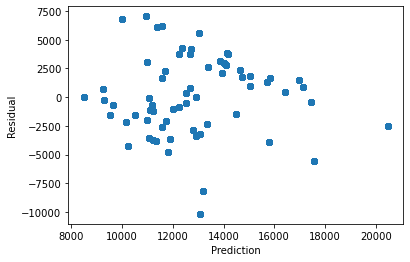

In [233]:
#checking residuals of model #1  #not being used so turning to markdown atm
import matplotlib.pyplot as plt
figure = plt.scatter(fitted_model.predict(), fitted_model.resid)
figure.axes.set_ylabel('Residual')
figure.axes.set_xlabel('Prediction')  

#adding columns to df and plotting them (hasnt worked yet)
df_resid['residuals'] = fitted_model.resid
df_resid['predicted'] = fitted_model.predict(X)

In [181]:
#try to split data for training and testing
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [223]:
#model #2 code #thank you to Heather Hardway for sharing her code for model #2, i am comparing her modeling method for model #2 to other models in this file
from sklearn.linear_model import LinearRegression, Lasso, Ridge
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [265]:
X = pd.get_dummies(test_df[['mileage', 'ext_color', 'int_color', 'engine_size', 'cylinders', 'transmission', 'awd']], drop_first=True)
y = test_df['price']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42) #splitting original data (X,y) into test data sets and train data sets


In [267]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111111, random_state=42) #splitting train data into train data and val data sets

In [268]:
X_train.shape[0]/X.shape[0]   #training data is 80% of the data, val is 10%, test is 10%

0.7976391231028668

In [269]:
model2 = LinearRegression()   #running and fitting regression
model2.fit(X_train, y_train)

LinearRegression()

In [270]:
r2_score(y_train, model2.predict(X_train)) #checking r^2 for train data

0.31318223646323917

In [271]:
r2_score(y_val, model2.predict(X_val)) #checking r^2 for val data

0.2766156131087849

plt.plot(y_train, model2.predict(X_train), 'o') #plot the acual results (y train) vs the predicted result(X_train)
#plt.plot([0,18000], [0,18000], '--')
m, b = np.polyfit(y_train, model2.predict(X_train), 1)
plt.plot(x, m*x+b, color = 'red')

/Users/erikpaulson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

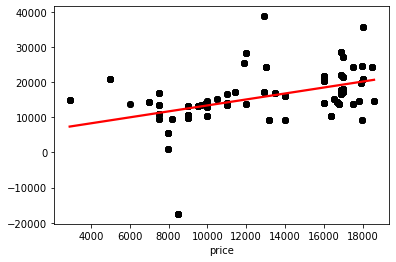

In [252]:
import seaborn as sns
#plot the acual results (y train) vs the predicted result(X_train)

sns.regplot(y_train, model2.predict(X_train), ci=None, scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [219]:
def adj_r2(actual, pred, n,p):
    #n = X_train.shape[0]#number of rows
    #p = X_train.shape[1]#number of columns
    r2 = r2_score(actual, pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2



eval_scores = pd.DataFrame(columns = ['train_r2', 'val_r2', 'test_r2'])
eval_scores.loc['base_model'] = [r2_score(y_train, model2.predict(X_train)), r2_score(y_val, model2.predict(X_val)), r2_score(y_test, model2.predict(X_test))]
eval_scores

,train_r2,val_r2,test_r2
base_model,0.313182,0.276616,0.240503


In [224]:
alphas = np.logspace(-4, 1, 20)

#For ridge/lasso, need to standardize features,  
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_train, y_train)
    eval_scores.loc['lasso_'+str(a)] = [r2_score(y_train, model.predict(X_train)), r2_score(y_val, model.predict(X_val)),r2_score(y_test, model.predict(X_test))]

In [225]:
eval_scores

,train_r2,val_r2,test_r2
base_model,0.313182,0.276616,0.240503
lasso_0.0001,0.313182,0.276616,0.240503
lasso_0.00018329807108324357,0.313182,0.276616,0.240503
lasso_0.0003359818286283781,0.313182,0.276616,0.240503
lasso_0.0006158482110660267,0.313182,0.276615,0.240503
lasso_0.0011288378916846883,0.313182,0.276615,0.240504
lasso_0.00206913808111479,0.313182,0.276615,0.240504
lasso_0.00379269019073225,0.313182,0.276614,0.240504
lasso_0.0069519279617756054,0.313182,0.276613,0.240506
lasso_0.012742749857031334,0.313182,0.276611,0.240508


In [226]:
alphas =np.logspace(-4, 1, 20)
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    eval_scores.loc['lasso_'+str(a)] = [r2_score(y_train, model.predict(X_train)), r2_score(y_val, model.predict(X_val)),r2_score(y_test, model.predict(X_test))]

In [254]:
eval_scores.sort_values('val_r2')

,train_r2,val_r2,test_r2
lasso_10.0,0.312304,0.271254,0.242194
lasso_5.455594781168514,0.312845,0.273101,0.241659
lasso_2.9763514416313193,0.313063,0.274488,0.241241
lasso_1.623776739188721,0.313143,0.275388,0.240948
lasso_0.8858667904100823,0.313170,0.275925,0.240761
lasso_0.4832930238571752,0.313178,0.276233,0.240649
lasso_0.26366508987303583,0.313181,0.276405,0.240584
lasso_0.14384498882876628,0.313182,0.276500,0.240548
lasso_0.07847599703514607,0.313182,0.276552,0.240528
lasso_0.04281332398719392,0.313182,0.276581,0.240517


In [ ]:
#trying to refine model building a 3rd model (model3) by using only the best 10 features 
#model 3 is built off model 2, but with less valuable features included so it should be cross validated already

In [257]:
X.shape

(593, 17)

In [258]:
from sklearn.feature_selection import SelectKBest, chi2

In [259]:
X_new = SelectKBest(chi2, k=10).fit_transform(X,y) #selecting the 10 best features to use in model

In [260]:
X_new.shape

(593, 10)

In [262]:
#checking model3 r2 score with X_new
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.1, random_state = 42)
X_new_train, X_new_val, y_train, y_val = train_test_split(X_new_train, y_train, test_size=0.1111111, random_state=42)
model3 = LinearRegression()   #running and fitting regression
model3.fit(X_new_train, y_train)
print(r2_score(y_train, model3.predict(X_new_train))) #checking r^2 for train data
print(r2_score(y_val, model3.predict(X_new_val))) #checking r^2 for val data

0.2869524050685559
0.2358802224405081


In [272]:
#from model2 r2 score
print(r2_score(y_train, model2.predict(X_train))) #checking r^2 for train data
print(r2_score(y_val, model2.predict(X_val))) #checking r^2 for val data

0.31318223646323917
0.2766156131087849


In [ ]:
def adj_r2(actual, pred, n,p):
    #n = X_train.shape[0]#number of rows
    #p = X_train.shape[1]#number of columns
    r2 = r2_score(actual, pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2



n = X_new_train.shape[0]
p = X_new_train.shape[1]



adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [275]:
#adj r2 for model3
n = X_new_train.shape[0]
p = X_new_train.shape[1]
r2 = r2_score(y_train, model3.predict(X_new_train))
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.27151847444233423

In [276]:
#adj r2 for model2
n = X_train.shape[0]
p = X_train.shape[1]
r2 = r2_score(y_train, model2.predict(X_train))
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.2875209134299975

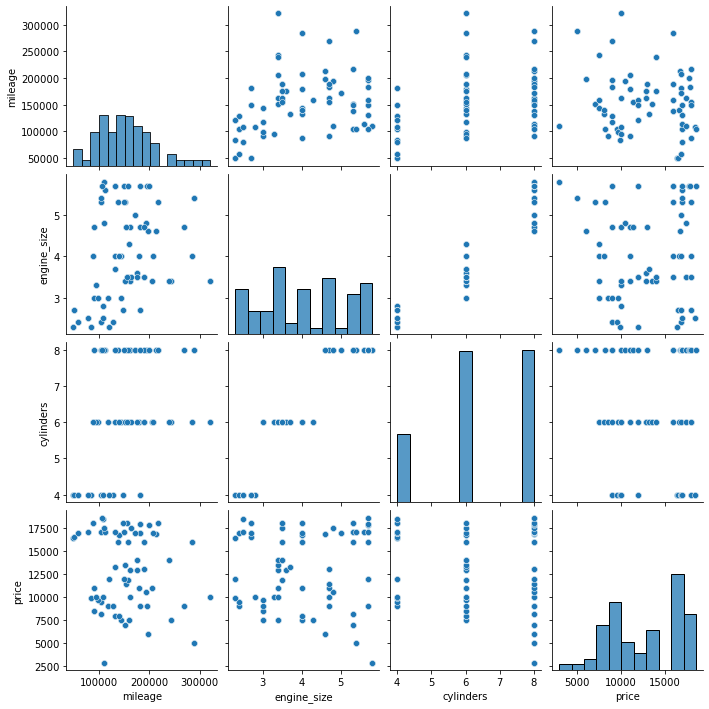

In [277]:
sns.pairplot(test_df)

In [278]:
test_df

,mileage,ext_color,int_color,engine_size,cylinders,transmission,awd,price
0,111000.0,White Exterior,Gray Interior,5.8,8.0,Automatic,no,2900.0
1,288025.0,White Exterior,Tan Interior,5.4,8.0,Automatic,yes,5000.0
2,198187.0,White Exterior,Gray Interior,4.6,8.0,Automatic,no,6000.0
3,151426.0,White Exterior,Gray Interior,5.3,8.0,Automatic,no,6999.0
4,143836.0,Gray Exterior,Gray Interior,4.0,6.0,Automatic,no,7490.0
...,...,...,...,...,...,...,...,...
623,155560.0,White Exterior,Tan Interior,3.5,6.0,Automatic,no,17988.0
624,217242.0,White Exterior,Tan Interior,5.3,8.0,Automatic,yes,17995.0
625,148567.0,White Exterior,Black Interior,2.7,4.0,Automatic,yes,17995.0
627,108279.0,White Exterior,Black Interior,2.5,4.0,Automatic,no,18480.0


In [280]:
model2.coef_

array([-1.69155844e-02,  9.06058988e+02, -6.82977627e+02, -3.84610072e+02,
       -1.30564502e+03,  4.95903128e+02, -1.51906004e+03, -1.20765919e+03,
       -4.37934573e+03, -2.71946418e+03,  8.79410783e+02, -3.52946040e+02,
        3.56332523e+03, -1.82639673e+02, -1.49953957e+03,  3.58252554e+03,
        4.30793256e+03])

In [281]:
model2.intercept_  #it seems like the base price (intercept) of a truck is ~15,794, then depending on values of each feature this number will change

15793.562702356023

In [284]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, model2.predict(X_train), squared=False)

3401.7176375582835

In [285]:
test_df['price'].mean()

12786.433389544689

In [287]:
mean_squared_error(y_train, model2.predict(X_train), squared=False) / test_df['price'].mean()

0.2660411651883962